# Libraries Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [8]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

# General Inspection

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24686 entries, 0 to 24685
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         24686 non-null  object 
 1   year          24686 non-null  int64  
 2   price         24686 non-null  int64  
 3   transmission  24686 non-null  object 
 4   mileage       24686 non-null  int64  
 5   fuelType      24686 non-null  object 
 6   tax           24686 non-null  int64  
 7   mpg           24686 non-null  float64
 8   engineSize    24686 non-null  float64
 9   brand         24686 non-null  object 
 10  ID            24686 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.1+ MB


In [10]:
train_df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,ID
count,24686,24686.000000,24686.000000,24686,24686.000000,24686,24686.000000,24686.000000,24686.000000,24686,24686.000000
unique,43,NaN,NaN,3,NaN,4,NaN,NaN,NaN,4,NaN
top,Golf,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN,VW,NaN
freq,2532,NaN,NaN,9388,NaN,13817,NaN,NaN,NaN,7524,NaN
mean,NaN,2017.230900,20780.246618,NaN,23305.655797,NaN,120.716601,54.398145,1.874532,NaN,23291.239609
std,NaN,2.086249,9801.517381,NaN,22310.025605,NaN,60.505073,14.722138,0.538128,NaN,13419.012649
min,NaN,1996.000000,650.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000,NaN,0.000000
25%,NaN,2016.000000,13995.000000,NaN,5932.500000,NaN,125.000000,45.600000,1.500000,NaN,11697.250000
50%,NaN,2017.000000,19248.000000,NaN,16921.500000,NaN,145.000000,53.300000,2.000000,NaN,23320.000000
75%,NaN,2019.000000,25495.000000,NaN,33913.750000,NaN,145.000000,61.400000,2.000000,NaN,34782.750000


In [11]:
train_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,ID
0,A1,2016,11995,Manual,22606,Petrol,30,57.6,1.4,Audi,22020
1,A4,2013,6000,Manual,129680,Diesel,30,64.2,2.0,Audi,35851
2,Golf,2016,13920,Manual,47576,Diesel,20,67.3,2.0,VW,20037
3,Golf,2015,10600,Manual,30983,Petrol,30,53.3,1.4,VW,33065
4,Golf,2019,21699,Semi-Auto,5229,Petrol,145,43.5,1.5,VW,34154


Comparison with test_df

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15896 entries, 0 to 15895
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15896 non-null  object 
 1   year          15896 non-null  int64  
 2   transmission  15896 non-null  object 
 3   mileage       15896 non-null  int64  
 4   fuelType      15896 non-null  object 
 5   tax           15896 non-null  int64  
 6   mpg           15896 non-null  float64
 7   engineSize    15896 non-null  float64
 8   brand         15896 non-null  object 
 9   ID            15896 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.2+ MB


# Target Distribution

Text(0.5, 1.0, 'Price Distribution')

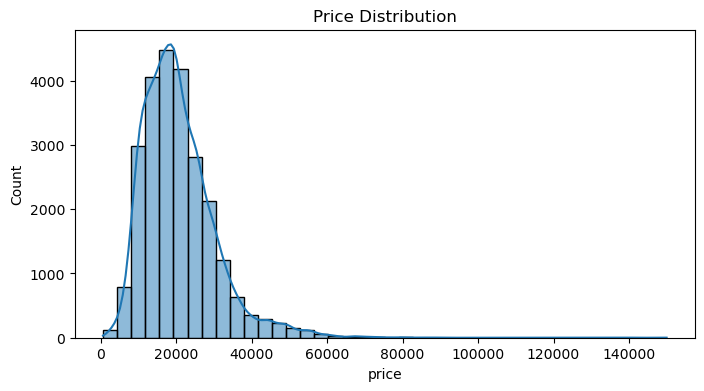

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['price'], kde=True, bins=40)
plt.title("Price Distribution")

### Interpretation

The price distribution is **heavily right-skewed**, with the majority of cars priced between **£5,000 and £30,000**, and a long tail extending to over **£140,000**.

### Consequences

- This skewness could **negatively impact regression models**, especially those sensitive to outliers or assuming normality (e.g., Linear Regression).
- A **log-transformation** of the target variable (`log(price)` or `log1p(price)`) might help stabilize variance and improve model performance.
- There may be **outliers** at the higher end of the price spectrum — consider capping or removing them depending on how models behave.

# Feature relationships

In [15]:
train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price         1.000000
year          0.596293
engineSize    0.540490
tax           0.395087
ID           -0.004968
mpg          -0.420004
mileage      -0.543773
Name: price, dtype: float64

# Look at categorical variables relationship with price

Transmission vs price

<Axes: xlabel='transmission', ylabel='price'>

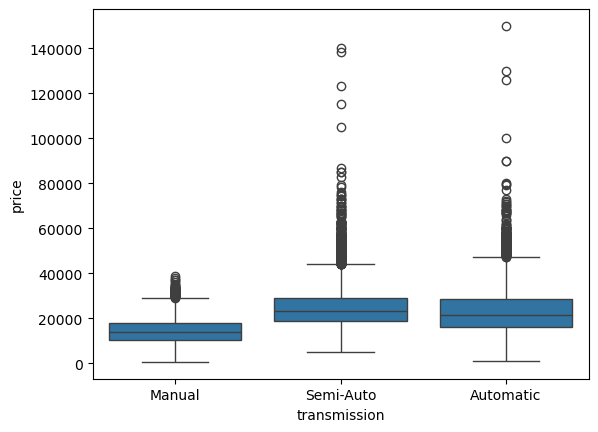

In [16]:
sns.boxplot(x='transmission', y='price', data=train_df)

Mean price per brand

In [17]:
train_df.groupby('brand')['price'].mean().sort_values(ascending=False)

brand
Mercedes    24321.508689
Audi        21918.232489
BMW         21202.644631
VW          16586.969298
Name: price, dtype: float64

# Checking for missing values

In [19]:
train_df.isnull().sum().sort_values(ascending=False)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
ID              0
dtype: int64

Perfect

# Comparison of tran vs test sets 

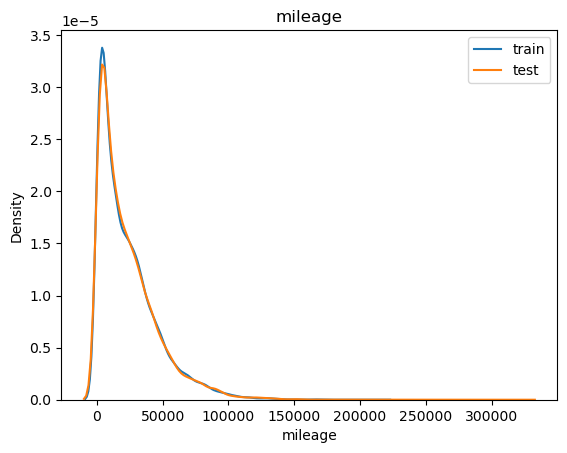

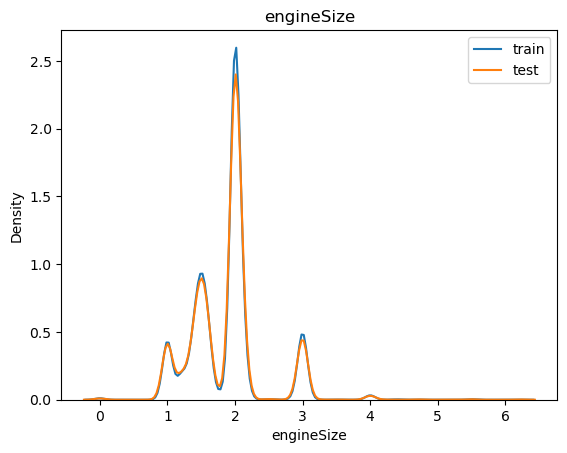

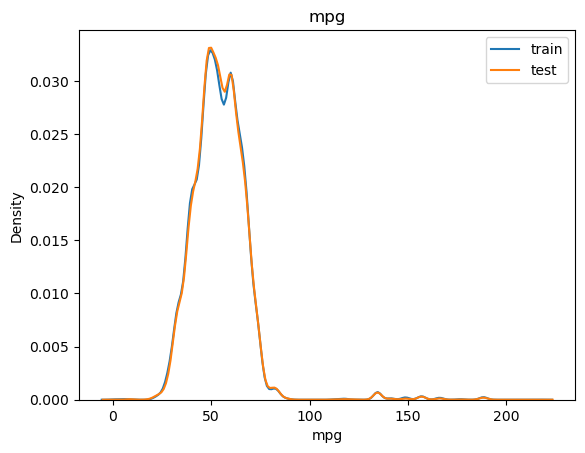

In [18]:
for col in ['mileage', 'engineSize', 'mpg']:
    sns.kdeplot(train_df[col], label='train')
    sns.kdeplot(test_df[col], label='test')
    plt.title(col)
    plt.legend()
    plt.show()

The distributions seem to be sufficiently similar 

# Outliers detection

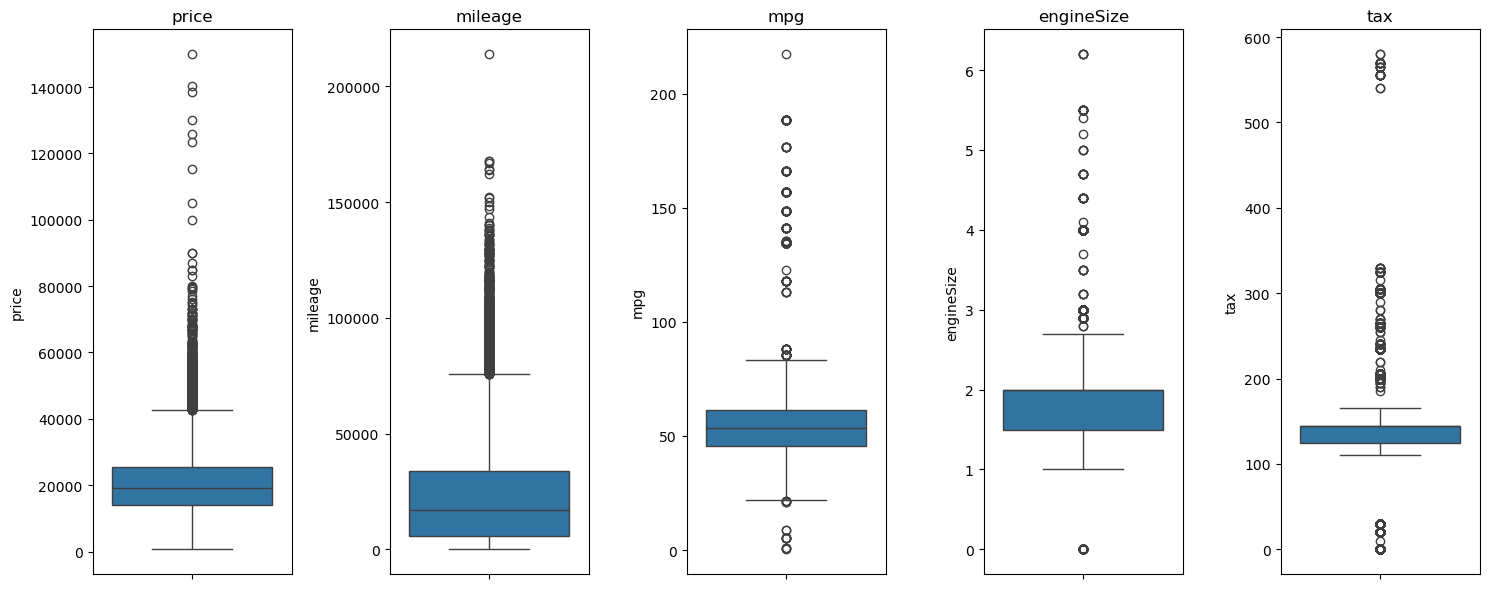

In [20]:
num_cols = ['price', 'mileage', 'mpg', 'engineSize', 'tax']

plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=train_df[col])
    plt.title(col)
    plt.tight_layout()

# Feature combination exploration

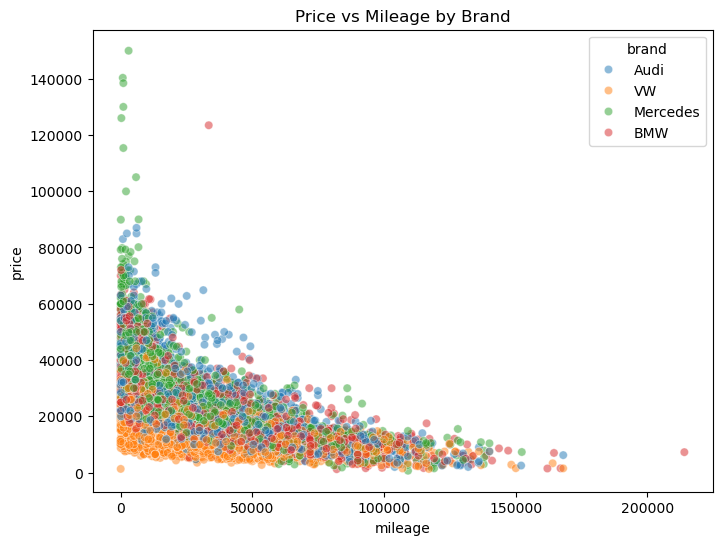

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='mileage', y='price', hue='brand', alpha=0.5)
plt.title("Price vs Mileage by Brand")
plt.show()

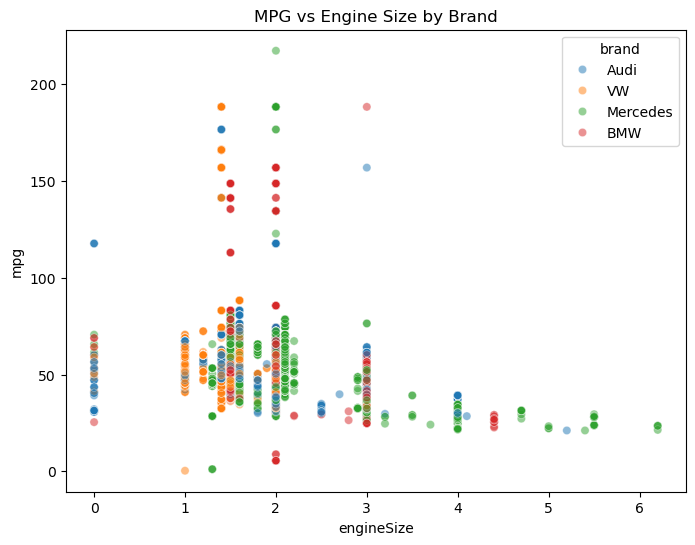

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='engineSize', y='mpg', hue='brand', alpha=0.5)
plt.title("MPG vs Engine Size by Brand")
plt.show()